# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = 'imperial'
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='

name = []
lat = []
lng = []
max_temp = []
cloudiness = []
humidity = []
wind_speed = []
country = []
date = []

for city in cities:
    response = requests.get(url+city).json()
#     pprint(response)

    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f'{city} found. Appending information.')
        
    except:
        print('City not found. Skipping...')
        pass


City not found. Skipping...
grindavik found. Appending information.
puerto ayora found. Appending information.
gimli found. Appending information.
chara found. Appending information.
pisco found. Appending information.
atuona found. Appending information.
kruisfontein found. Appending information.
hermanus found. Appending information.
vaini found. Appending information.
mataura found. Appending information.
qaanaaq found. Appending information.
mar del plata found. Appending information.
san rafael found. Appending information.
chokurdakh found. Appending information.
setermoen found. Appending information.
punta arenas found. Appending information.
lasa found. Appending information.
lagoa found. Appending information.
karasjok found. Appending information.
avarua found. Appending information.
City not found. Skipping...
salalah found. Appending information.
hilo found. Appending information.
khatanga found. Appending information.
muros found. Appending information.
City not found. Sk

mithi found. Appending information.
hamilton found. Appending information.
krasnaya gorka found. Appending information.
swellendam found. Appending information.
castro found. Appending information.
kavieng found. Appending information.
ketchikan found. Appending information.
espoo found. Appending information.
tooele found. Appending information.
hami found. Appending information.
yuzhno-kurilsk found. Appending information.
namatanai found. Appending information.
kayes found. Appending information.
baglan found. Appending information.
mindelo found. Appending information.
saskylakh found. Appending information.
los llanos de aridane found. Appending information.
te anau found. Appending information.
malakal found. Appending information.
adrar found. Appending information.
bairiki found. Appending information.
selikhino found. Appending information.
chuy found. Appending information.
zlitan found. Appending information.
galesong found. Appending information.
saldanha found. Appending i

dhidhdhoo found. Appending information.
sitio novo do tocantins found. Appending information.
gladstone found. Appending information.
talnakh found. Appending information.
moron found. Appending information.
coihaique found. Appending information.
palmer found. Appending information.
tibati found. Appending information.
shirhatti found. Appending information.
lagos found. Appending information.
ishigaki found. Appending information.
humaita found. Appending information.
ranong found. Appending information.
afua found. Appending information.
banepa found. Appending information.
atasu found. Appending information.
neuquen found. Appending information.
kiruna found. Appending information.
bayangol found. Appending information.
esmeralda found. Appending information.
thinadhoo found. Appending information.
mouzouras found. Appending information.
tura found. Appending information.
dunedin found. Appending information.
barcelos found. Appending information.
ornskoldsvik found. Appending info

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df = pd.DataFrame({
    'City' : name,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp' : max_temp,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date': date
})
weather_df.head()
weather_df.to_csv(r'../output_data/cities.csv', index=False)

In [9]:
stats = weather_df.describe()
stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.00000,5.800000e+02
mean,19.181506,19.181212,10.623897,70.810345,53.529310,3.49800,1.611505e+09
std,33.558968,90.760578,19.791705,21.868390,38.575152,2.48262,7.871318e+01
min,-54.800000,-179.166700,-50.300000,7.000000,0.000000,0.20000,1.611505e+09
25%,-7.871025,-59.673975,-0.275000,60.750000,17.000000,1.55000,1.611505e+09
50%,22.137900,23.432800,17.475000,77.000000,62.000000,2.99500,1.611505e+09
75%,46.899975,102.099525,26.000000,87.000000,90.000000,4.71750,1.611505e+09
max,78.218600,178.416700,37.770000,100.000000,100.000000,13.89000,1.611505e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [50]:
humidity = weather_df.loc[weather_df['Humidity']>=100]
humidity.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
8,Vaini,-21.2000,-175.2000,22.00,100,90,5.19,TO,1611505063
117,Kununurra,-15.7667,128.7333,25.00,100,100,1.54,AU,1611505132
199,Ketchikan,55.3422,-131.6461,1.00,100,90,2.06,US,1611505230
200,Espoo,60.2500,24.6667,2.22,100,90,3.60,FI,1611505230
201,Tooele,40.5308,-112.2983,-2.00,100,90,1.10,US,1611504971


In [48]:
#  Get the indices of cities that have humidity over 100%.
h_index=list(np.where(weather_df['Humidity']>=100))
print(h_index)

[array([  8, 117, 199, 200, 201, 217, 222, 257, 456, 466, 492, 495, 500,
       518, 540, 562, 566], dtype=int64)]


In [79]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data = weather_df.drop(weather_df.index[h_index], axis=0)
city_data.head()

C:\Users\krist\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexes\base.py:3941: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grindavik,63.8424,-22.4338,-2.00,74,20,11.32,IS,1611505202
1,Puerto Ayora,-0.7393,-90.3518,28.00,74,75,6.17,EC,1611505203
2,Gimli,50.6336,-96.9907,-25.00,70,10,3.09,CA,1611504908
3,Chara,56.9064,118.2631,-30.89,74,5,0.38,RU,1611505203
4,Pisco,-13.7000,-76.2167,25.00,65,0,4.12,PE,1611505203


In [71]:
len(city_data)

563

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

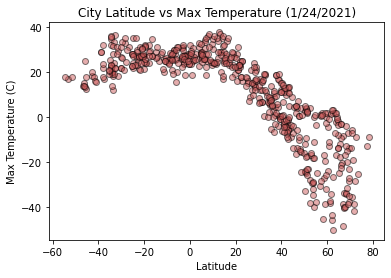

In [150]:
x=city_data['Lat']
y=city_data['Max Temp']

plt.scatter(x, y, facecolor = 'indianred', alpha = .5, edgecolor='k')
plt.title('City Latitude vs Max Temperature (1/24/2021)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.savefig('../output_data/lat_max_temp.png')

plt.show()

## Latitude vs. Humidity Plot

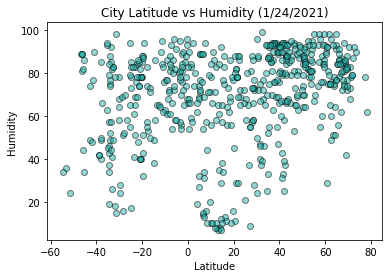

In [54]:
x=city_data['Lat']
y=city_data['Humidity']

plt.scatter(x, y, facecolor = 'lightseagreen', alpha = .5, edgecolor='k')
plt.title('City Latitude vs Humidity (1/24/2021)')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.savefig('../output_data/lat_humidity.png')

plt.show()

## Latitude vs. Cloudiness Plot

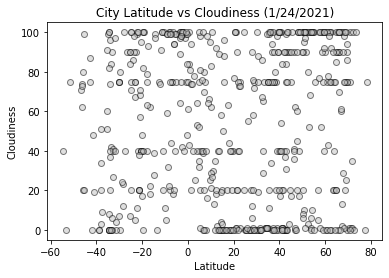

In [55]:
x=city_data['Lat']
y=city_data['Cloudiness']

plt.scatter(x, y, facecolor = 'silver', alpha = .5, edgecolor='k')
plt.title('City Latitude vs Cloudiness (1/24/2021)')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.savefig('../output_data/lat_cloud.png')

plt.show()

## Latitude vs. Wind Speed Plot

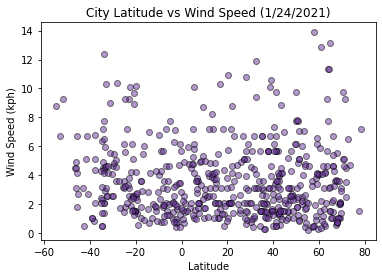

In [56]:
x=city_data['Lat']
y=city_data['Wind Speed']

plt.scatter(x, y, facecolor = 'rebeccapurple', alpha = .5, edgecolor='k')
plt.title('City Latitude vs Wind Speed (1/24/2021)')
plt.ylabel('Wind Speed (kph)')
plt.xlabel('Latitude')
plt.savefig('../output_data/lat_wind.png')

plt.show()

## Linear Regression

In [72]:
n_hemi = city_data.loc[(city_data['Lat'] > 0) & (city_data['Lat'] <= 90)]
len(n_hemi)

382

In [78]:
s_hemi = city_data.loc[(city_data['Lat'] >= -90) & (city_data['Lat'] <= 0)]
len(s_hemi)

181

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7399284681215773


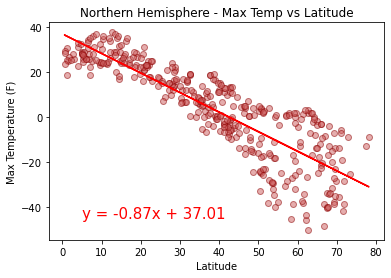

In [151]:
x_values = n_hemi['Lat']
y_values = n_hemi['Max Temp']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'indianred', 
            alpha = .5, edgecolor='darkred')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (5,-45), fontsize=15, color="red")

plt.title('Northern Hemisphere - Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/nh_lat_max.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.1318681130753721


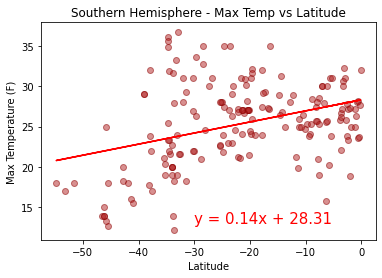

In [152]:
x_values = s_hemi['Lat']
y_values = s_hemi['Max Temp']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'firebrick', 
            alpha = .5, edgecolor='darkred')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (-30, 13), fontsize=15, color="red")

plt.title('Southern Hemisphere - Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/sh_lat_max.png')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1660344021472794


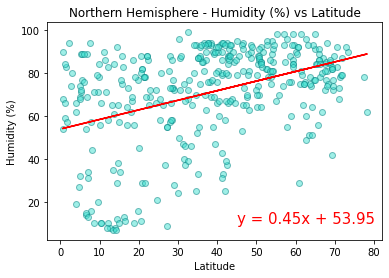

In [143]:
x_values = n_hemi['Lat']
y_values = n_hemi['Humidity']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'turquoise', 
            alpha = .5, edgecolor='teal')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (45,10), fontsize=15, color="red")

plt.title('Northern Hemisphere - Humidity (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/nh_lat_max.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10643096854085324


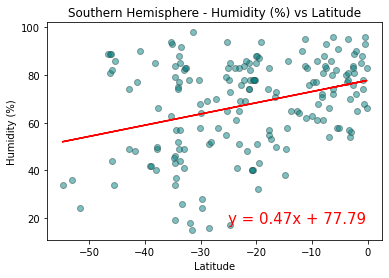

In [142]:
x_values = s_hemi['Lat']
y_values = s_hemi['Humidity']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'teal', 
            alpha = .5, edgecolor='darkslategrey')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (-25, 18), fontsize=15, color="red")

plt.title('Southern Hemisphere - Humidity (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/sh_lat_max.png')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03434415672222393


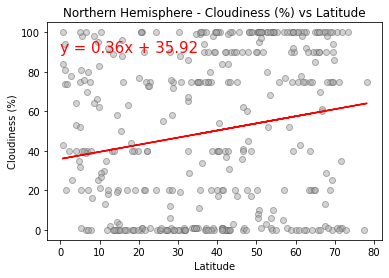

In [140]:
x_values = n_hemi['Lat']
y_values = n_hemi['Cloudiness']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'darkgray', 
            alpha = .5, edgecolor='dimgray')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (0,90), fontsize=15, color="red")

plt.title('Northern Hemisphere - Cloudiness (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/nh_lat_max.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13113406248109621


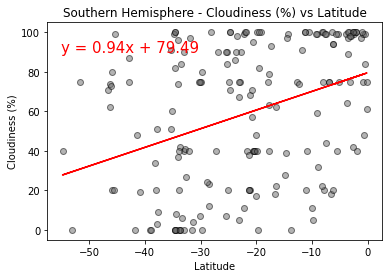

In [141]:
x_values = s_hemi['Lat']
y_values = s_hemi['Cloudiness']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'dimgray', 
            alpha = .5, edgecolor='k')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (-55, 90), fontsize=15, color="red")

plt.title('Southern Hemisphere - Cloudiness (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/sh_lat_max.png')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0009011546038451826


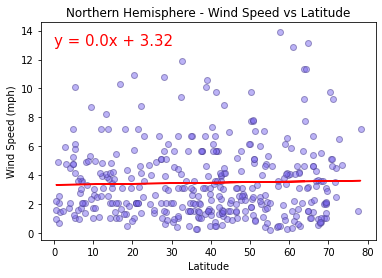

In [138]:
x_values = n_hemi['Lat']
y_values = n_hemi['Wind Speed']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'mediumslateblue', 
            alpha = .5, edgecolor='darkslateblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (0,13), fontsize=15, color="red")

plt.title('Northern Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/nh_lat_max.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06898938281406654


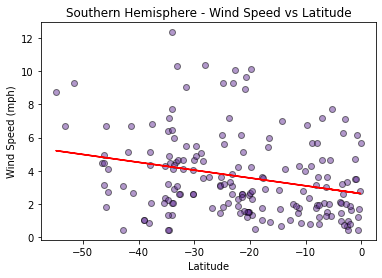

In [137]:
x_values = s_hemi['Lat']
y_values = s_hemi['Wind Speed']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'rebeccapurple', 
            alpha = .5, edgecolor='k')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (-30, 13), fontsize=15, color="red")

plt.title('Southern Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/sh_lat_max.png')

plt.show()